# Conjunto de datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import os

# URL del dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

# Ruta para guardar los datos
raw_path = '/workspace/regularized-linear/data/raw'
os.makedirs(raw_path, exist_ok=True)
raw_file = f"{raw_path}/demographic_health_data.csv"

# Cargar el dataset desde la URL
df = pd.read_csv(url)
print("Datos cargados desde la URL con éxito.")

# Guardar una copia local
df.to_csv(raw_file, index=False)
print(f"Datos guardados en: {raw_file}")

# Vista rápida de los datos
print("\nVista rápida del dataset:")
print(df.head())

# Inspección inicial de los datos
print("\nInformación del dataset:")
print(df.info())


Datos cargados desde la URL con éxito.
Datos guardados en: /workspace/regularized-linear/data/raw/demographic_health_data.csv

Vista rápida del dataset:
   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalenc

# Análisis exploratorio de datos

Our dataframe contains 3140 rows and 108 features.

Número de valores nulos por columna:
Series([], dtype: int64)

Variables categóricas: ['COUNTY_NAME', 'STATE_NAME']
Variables numéricas: ['TOT_POP', '0-9', '0-9_y-o_%_of_total_pop', '19-Oct', '10-19_y-o_%_of_total_pop', '20-29', '20-29_y-o_%_of_total_pop', '30-39', '30-39_y-o_%_of_total_pop', '40-49', '40-49_y-o_%_of_total_pop', '50-59', '50-59_y-o_%_of_total_pop', '60-69', '60-69_y-o_%_of_total_pop', '70-79', '70-79_y-o_%_of_total_pop', '80+', '80+_y-o_%_of_total_pop', 'White-alone_pop', '%_White-alone', 'Black-alone_pop', '%_Black-alone', 'Native_American-American_Indian-alone_pop', '%_NA-AI-alone', 'Asian-alone_pop', '%_Asian-alone', 'Hawaiian-Pacific_Islander-alone_pop', '%_Hawaiian-PI-alone', 'Two_or_more_races_pop', '%_Two_or_more_races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less_than

/tmp/ipykernel_1498/1368678993.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), fontsize=8, rotation=90)
/tmp/ipykernel_1498/1368678993.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), fontsize=8, rotation=90)


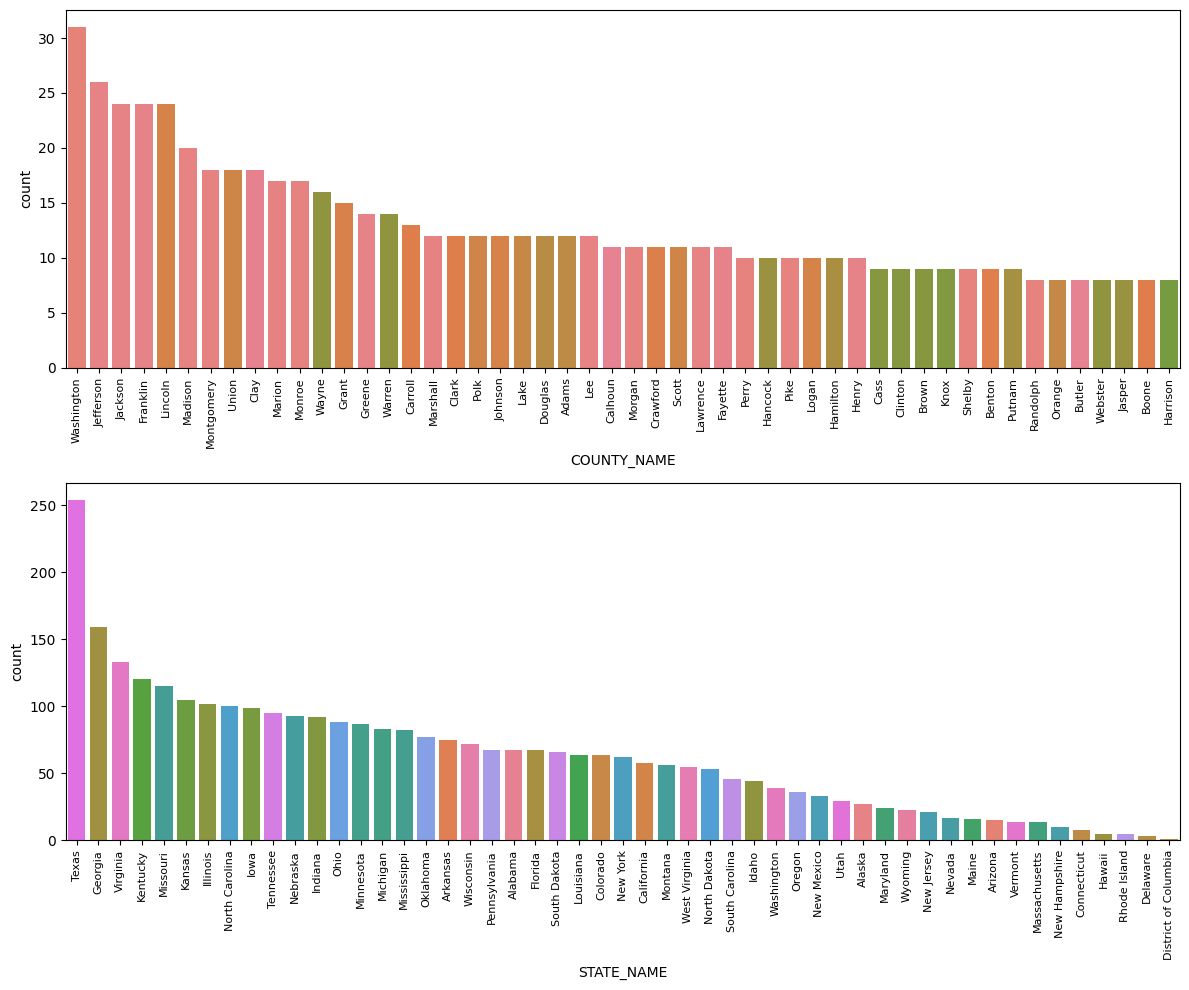


Distribuciones de variables numéricas:



Mapa de calor de correlaciones:


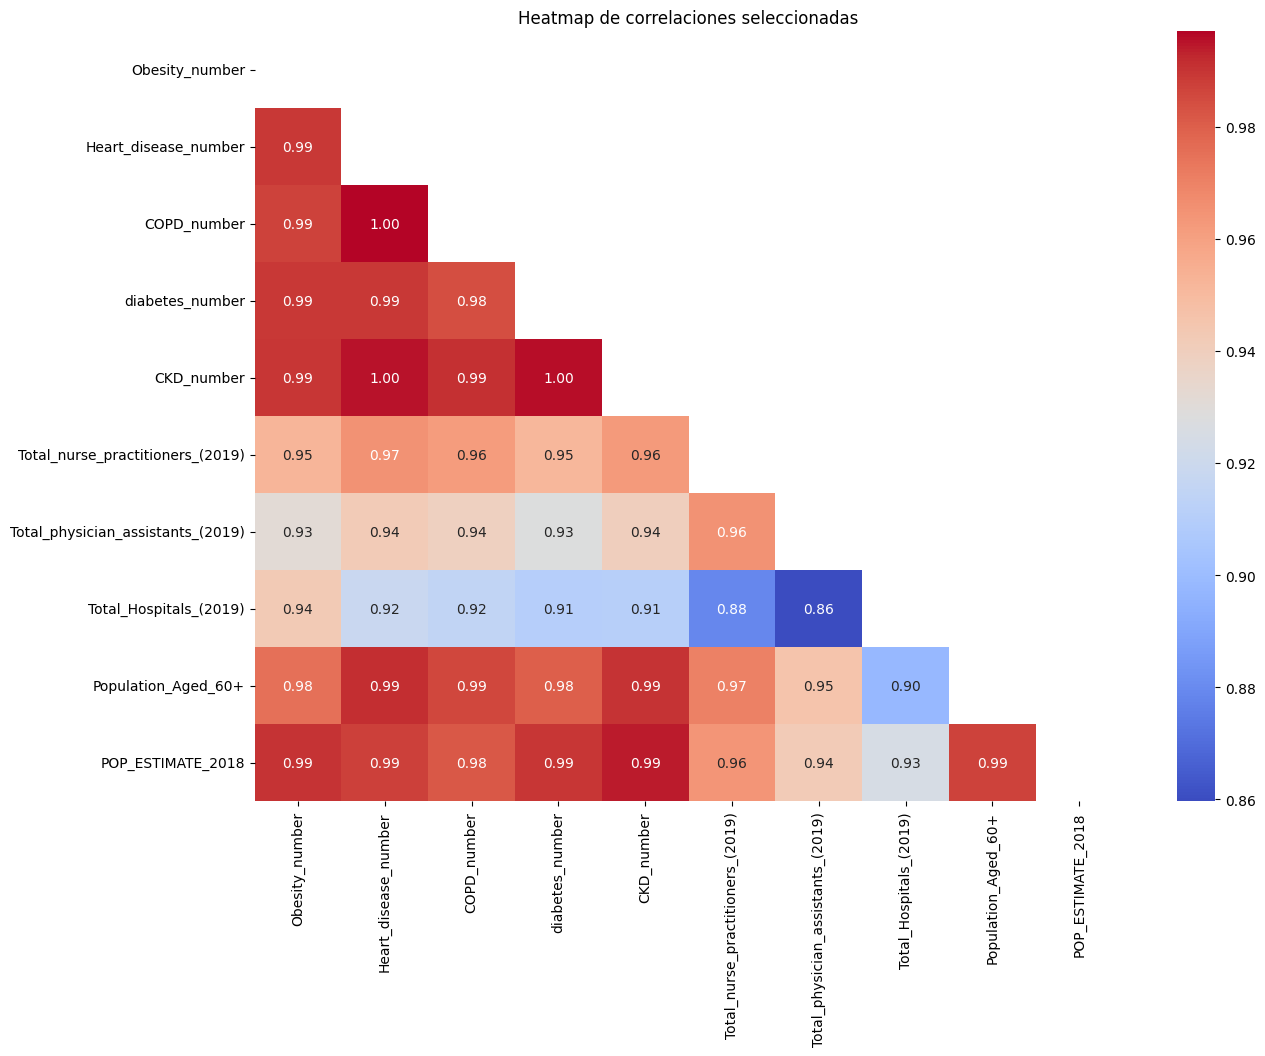


Codificación de variables categóricas:

Guardando datasets procesados:
¡Datos guardados con éxito!


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from sklearn.model_selection import train_test_split

# === Configuración inicial ===
raw_file = '/workspace/regularized-linear/data/raw/demographic_health_data.csv'
interim_path = '/workspace/regularized-linear/data/interim'
processed_path = '/workspace/regularized-linear/data/processed'
os.makedirs(interim_path, exist_ok=True)
os.makedirs(processed_path, exist_ok=True)

# === Cargar datos ===
df = pd.read_csv(raw_file)
print(f"Our dataframe contains {len(df)} rows and {df.shape[1]} features.")

# === Limpieza de datos ===
# Identificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df.isna().sum()[df.isna().sum() > 0])

# Eliminar columnas irrelevantes
drop_columns = [
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    "Percent of adults completing some college or associate's degree 2014-18",
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'fips', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
    'Unemployment_rate_2018', 'CI90LBINC_2018', 'CI90UBINC_2018'
]
df.drop(columns=drop_columns, inplace=True)

# Renombrar columnas para mayor consistencia
df.columns = [col.replace(" ", "_").replace("/", "-") for col in df.columns]

# Dividir en numéricas y categóricas
num_types = ['int64', 'float64']
cat_types = ['O']
df_num = df.select_dtypes(include=num_types)
df_cat = df.select_dtypes(include=cat_types)

print("\nVariables categóricas:", df_cat.columns.tolist())
print("Variables numéricas:", df_num.columns.tolist())

# === Análisis univariado ===
# Variables categóricas
print("\nDistribuciones de variables categóricas:")
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.countplot(ax=ax[0], data=df_cat, x='COUNTY_NAME', order=df_cat['COUNTY_NAME'].value_counts().index[:50], hue='COUNTY_NAME')
sns.countplot(ax=ax[1], data=df_cat, x='STATE_NAME', order=df_cat['STATE_NAME'].value_counts().index, hue='STATE_NAME')
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontsize=8, rotation=90)
plt.tight_layout()
plt.show()

# Variables numéricas
print("\nDistribuciones de variables numéricas:")
fig, axes = plt.subplots(len(df_num.columns), 2, figsize=(20, len(df_num.columns) * 5))
for i, col in enumerate(df_num.columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0])
    sns.boxplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 0].set_title(f"Distribución de {col}")
    axes[i, 1].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# === Análisis multivariado ===
selected_cols = [
    'Obesity_number', 'Heart_disease_number', 'COPD_number', 'diabetes_number', 'CKD_number',
    'Total_nurse_practitioners_(2019)', 'Total_physician_assistants_(2019)', 'Total_Hospitals_(2019)',
    'Population_Aged_60+', 'POP_ESTIMATE_2018'
]
print("\nMapa de calor de correlaciones:")
plt.figure(figsize=(14, 10))
sns.heatmap(df[selected_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(df[selected_cols].corr()))
plt.title("Heatmap de correlaciones seleccionadas")
plt.show()

# === Codificación categórica ===
print("\nCodificación de variables categóricas:")
for cat_var in df_cat.columns:
    encoder = {val: idx for idx, val in enumerate(df[cat_var].unique())}
    json_file = f'{interim_path}/enc_{cat_var}.json'
    json.dump(encoder, open(json_file, 'w'))
    df[cat_var] = df[cat_var].map(encoder)

# === Tratamiento de outliers ===
def remove_outliers(x, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + 1.5 * iqr
    lower_lim = max(0, q1 - 1.5 * iqr) if not allow_neg else q1 - 1.5 * iqr
    return np.clip(x, lower_lim, upper_lim)

df_no_outliers = df.copy()
for col in df_num.columns:
    df_no_outliers[col] = remove_outliers(df_no_outliers[col])

# === División en train/test ===
target = 'Heart_disease_number'
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(df.drop(columns=[target]), df[target], test_size=0.2, random_state=123)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(df_no_outliers.drop(columns=[target]), df_no_outliers[target], test_size=0.2, random_state=123)

# Guardar datasets
print("\nGuardando datasets procesados:")
X_train_wo.to_csv(f"{processed_path}/X_train_with_outliers.csv", index=False)
X_test_wo.to_csv(f"{processed_path}/X_test_with_outliers.csv", index=False)
y_train_wo.to_csv(f"{processed_path}/y_train.csv", index=False)
y_test_wo.to_csv(f"{processed_path}/y_test.csv", index=False)
X_train_no.to_csv(f"{processed_path}/X_train_without_outliers.csv", index=False)
X_test_no.to_csv(f"{processed_path}/X_test_without_outliers.csv", index=False)
print("¡Datos guardados con éxito!")



# Modelado de Regresión Lineal y Lasso


=== Regresión Lineal Básica ===
MSE (Linear): 714396.0843
R² (Linear): 0.9975

=== Lasso Regression ===


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+08, tolerance: 5.834e+07
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+08, tolerance: 5.834e+07
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

Mejor alpha (Lasso): 2.87
Mejor R² (Lasso): 0.9983
Mejor MSE (Lasso): 499404.6275


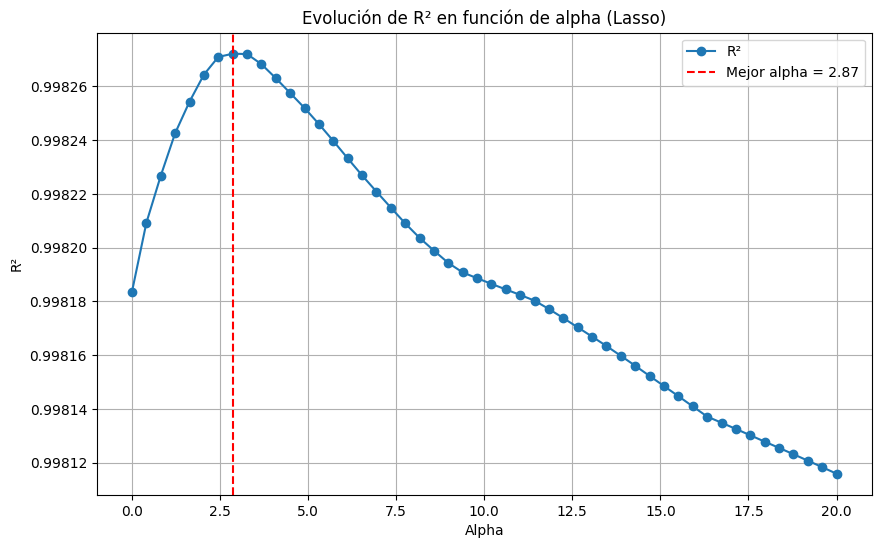

In [6]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# === Cargar datasets procesados ===
processed_path = '/workspace/regularized-linear/data/processed'
X_train = pd.read_csv(f"{processed_path}/X_train_with_outliers.csv")
X_test = pd.read_csv(f"{processed_path}/X_test_with_outliers.csv")
y_train = pd.read_csv(f"{processed_path}/y_train.csv")["Heart_disease_number"]
y_test = pd.read_csv(f"{processed_path}/y_test.csv")["Heart_disease_number"]

# === Modelo de Regresión Lineal Básica ===
print("\n=== Regresión Lineal Básica ===")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluación del modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"MSE (Linear): {mse_linear:.4f}")
print(f"R² (Linear): {r2_linear:.4f}")

# === Modelo de Lasso ===
print("\n=== Lasso Regression ===")
alphas = np.linspace(0.01, 20, 50)  # Probar 50 valores de alpha entre 0.01 y 20
r2_scores = []
mse_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    # Evaluación
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_scores.append(mse_lasso)
    r2_scores.append(r2_lasso)

# Encontrar el mejor alpha
best_alpha_idx = np.argmax(r2_scores)
best_alpha = alphas[best_alpha_idx]
best_r2 = r2_scores[best_alpha_idx]
best_mse = mse_scores[best_alpha_idx]

print(f"Mejor alpha (Lasso): {best_alpha:.2f}")
print(f"Mejor R² (Lasso): {best_r2:.4f}")
print(f"Mejor MSE (Lasso): {best_mse:.4f}")

# === Gráfico de evolución de R² en función de alpha ===
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o', label="R²")
plt.title("Evolución de R² en función de alpha (Lasso)")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.axvline(best_alpha, color='r', linestyle='--', label=f"Mejor alpha = {best_alpha:.2f}")
plt.legend()
plt.grid()
plt.show()


# Optimización del modelo


=== Optimización con LassoCV ===


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90293857.0531779, tolerance: 48044681.40407168
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92132108.92681858, tolerance: 49417599.1215992
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73790777.8371369, tolerance: 34325925.57719329
  model = cd_fast.enet_coordinate_descent_gram(
/workspace/.pyenv_mirror/

Resultados con outliers:
Mejor alpha (LassoCV): 20.0000
MSE: 4918142175.7406, R²: -16.0156

Resultados sin outliers:
Mejor alpha (LassoCV sin outliers): 6.4714
MSE: 145399467.5790, R²: 0.4970


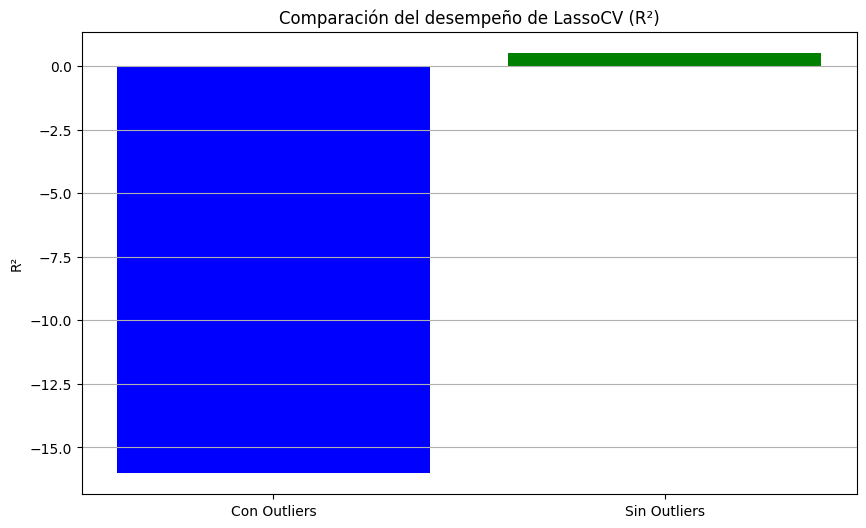

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV

# === Cargar datasets con y sin outliers ===
X_train_no = pd.read_csv(f"{processed_path}/X_train_without_outliers.csv")
X_test_no = pd.read_csv(f"{processed_path}/X_test_without_outliers.csv")

# Escalar los datos
scaler = StandardScaler()

# === Modelo de Lasso con búsqueda de alpha optimizada (LassoCV) ===
print("\n=== Optimización con LassoCV ===")
lasso_cv = Pipeline([
    ('scaler', scaler),
    ('lasso', LassoCV(alphas=np.linspace(0.01, 20, 100), cv=5, max_iter=10000))
])

# Entrenamiento con datos con y sin outliers
lasso_cv.fit(X_train, y_train)
lasso_cv_no = Pipeline([
    ('scaler', scaler),
    ('lasso', LassoCV(alphas=np.linspace(0.01, 20, 100), cv=5, max_iter=10000))
])
lasso_cv_no.fit(X_train_no, y_train)

# Predicciones
y_pred_cv = lasso_cv.predict(X_test)
y_pred_cv_no = lasso_cv_no.predict(X_test_no)

# Evaluación de resultados
mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

mse_cv_no = mean_squared_error(y_test, y_pred_cv_no)
r2_cv_no = r2_score(y_test, y_pred_cv_no)

print(f"Resultados con outliers:")
print(f"Mejor alpha (LassoCV): {lasso_cv.named_steps['lasso'].alpha_:.4f}")
print(f"MSE: {mse_cv:.4f}, R²: {r2_cv:.4f}")

print("\nResultados sin outliers:")
print(f"Mejor alpha (LassoCV sin outliers): {lasso_cv_no.named_steps['lasso'].alpha_:.4f}")
print(f"MSE: {mse_cv_no:.4f}, R²: {r2_cv_no:.4f}")

# === Comparación gráfica entre ambos enfoques ===
plt.figure(figsize=(10, 6))
plt.bar(["Con Outliers", "Sin Outliers"], [r2_cv, r2_cv_no], color=['blue', 'green'])
plt.title("Comparación del desempeño de LassoCV (R²)")
plt.ylabel("R²")
plt.grid(axis="y")
plt.show()
